In [1]:
#TP OCR IMAGE ET FACTURE
! pip install opencv-contrib-python

In [2]:
! pip install pytesseract

In [39]:
import pytesseract
import matplotlib.pyplot as plt
import cv2
from pytesseract import Output 
import re 

In [4]:
image = cv2.imread("image_test_OCR.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

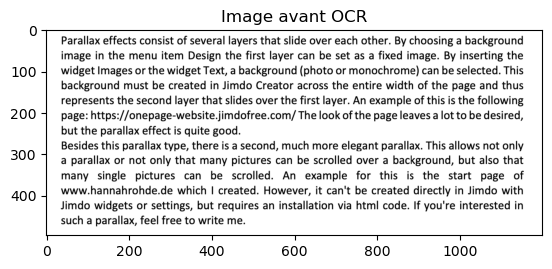

In [5]:
plt.imshow(image)
plt.title("Image avant OCR");


In [40]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [7]:
text = pytesseract.image_to_string(image)
print(text)

Parallax effects consist of several layers that slide over each other. By choosing a background
image in the menu item Design the first layer can be set as a fixed image. By inserting the
widget Images or the widget Text, a background (photo or monochrome) can be selected. This
background must be created in Jimdo Creator across the entire width of the page and thus
represents the second layer that slides over the first layer. An example of this is the following
page: https://onepage-website.jimdofree.com/ The look of the page leaves a lot to be desired,
but the parallax effect is quite good.

Besides this parallax type, there is a second, much more elegant parallax. This allows not only
a parallax or not only that many pictures can be scrolled over a background, but also that
many single pictures can be scrolled. An example for this is the start page of
www.hannahrohde.de which | created. However, it can't be created directly in Jimdo with
Jimdo widgets or settings, but requires an ins

In [8]:
!pip install gTTS

In [9]:
from gtts import gTTS
import os
#définir la langue tester avec l’image traduit par pytesseract
langue = 'en'
outObj = gTTS(text=text, lang=langue, slow=False)

In [10]:
outObj.save("rev.mp3")
print('playing the audio file')
os.system('rev.mp3')


playing the audio file


0

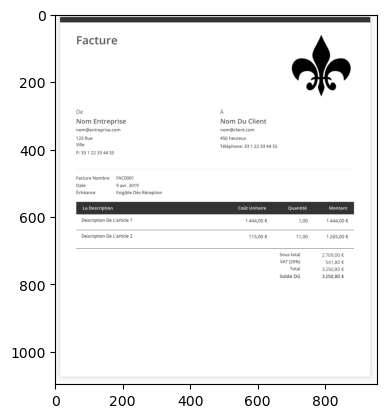

In [11]:
image = cv2.imread('facture.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [14]:
email_pattern = '\S+@\S+'
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [15]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        if re.match(email_pattern, d['text'][i]):
            print(f"Email: {d['text'][i]}")


Email: nom@entreprise.com
Email: nom@client.com


In [73]:
nom_f = r'Nom Entreprise\s+(.*?)\s+Nom Du Client'
email_f = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
date_f = r'Date\s*([^\n]+)'
numero_f = r'Facture\s*Nombre\s*—\s*([^\n]+)'
montant_total= r'Total\s*([0-9,.]+)\s*€'

In [74]:
text = pytesseract.image_to_string(image)
nom_match = re.search(nom_f, text)
nom = nom_match.group(1).strip() if nom_match else None
email_match = re.findall(email_f, text)
email = ", ".join(email_match) if email_match else None
date_match = re.search(date_f, text)
date = date_match.group(1).strip() if date_match else None
numero_match = re.search(numero_f, text)
numero = numero_match.group(1).strip() if numero_match else None
total_match = re.search(montant_total, text)
total = total_match.group(1).strip() if total_match else None

In [75]:
df = pd.DataFrame({
    'Nom du client': [nom],
    'E-mail': [email],
    'Date de la facture': [date],
    'Numéro de la facture': [numero],
    'Montant total': [montant]
})
df.head()

,Nom du client,E-mail,Date de la facture,Numéro de la facture,Montant total
0,None,"nom@entreprise.com, nom@client.com",9 avr. 2019,FACO001,"3250,80"


In [76]:
df.to_csv('facture.csv', index=False)

In [77]:
df = pd.read_csv('facture.csv')

In [78]:
for column in df.columns:
    print(f"{column}:")
    for value in df[column]:
        print(value)
    print()


Nom du client:
nan

E-mail:
nom@entreprise.com, nom@client.com

Date de la facture:
9 avr. 2019

Numéro de la facture:
FACO001

Montant total:
3250,80

